In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("humidity.csv")

In [3]:
data.shape

(701548, 6)

In [4]:
data.head()

,sensor_id,lat,lon,pressure,temperature,humidity
0,2266,42.738,23.272,95270.27,23.46,62.48
1,2292,42.663,23.273,94355.83,23.06,59.46
2,3096,42.700,23.360,95155.81,26.53,44.38
3,3428,42.624,23.406,94679.57,28.34,38.28
4,3472,42.669,23.318,94327.88,26.31,46.37


In [5]:
data.isnull().sum().sum()

0

In [6]:
data.duplicated().sum()

4035

In [7]:
data.columns

Index(['sensor_id', 'lat', 'lon', 'pressure', 'temperature', 'humidity'], dtype='object')

In [8]:
data = data.drop_duplicates()
print(data)

        sensor_id     lat     lon  pressure  temperature  humidity
0            2266  42.738  23.272  95270.27        23.46     62.48
1            2292  42.663  23.273  94355.83        23.06     59.46
2            3096  42.700  23.360  95155.81        26.53     44.38
3            3428  42.624  23.406  94679.57        28.34     38.28
4            3472  42.669  23.318  94327.88        26.31     46.37
...           ...     ...     ...       ...          ...       ...
701543       3558  42.671  23.364  95562.08        21.99     52.28
701544       3836  42.702  23.371  96070.06        21.41     56.84
701545       3296  42.671  23.325  95230.42        22.53     51.72
701546       2234  42.685  23.356  95653.14        23.01     49.78
701547       2232  42.685  23.301  95418.48        22.57     51.44

[697513 rows x 6 columns]


In [9]:
x = data[["lat","lon","pressure","humidity"]]

In [10]:
print(x)

           lat     lon  pressure  humidity
0       42.738  23.272  95270.27     62.48
1       42.663  23.273  94355.83     59.46
2       42.700  23.360  95155.81     44.38
3       42.624  23.406  94679.57     38.28
4       42.669  23.318  94327.88     46.37
...        ...     ...       ...       ...
701543  42.671  23.364  95562.08     52.28
701544  42.702  23.371  96070.06     56.84
701545  42.671  23.325  95230.42     51.72
701546  42.685  23.356  95653.14     49.78
701547  42.685  23.301  95418.48     51.44

[697513 rows x 4 columns]


In [11]:
y = data[["temperature"]]

In [12]:
print(y)

        temperature
0             23.46
1             23.06
2             26.53
3             28.34
4             26.31
...             ...
701543        21.99
701544        21.41
701545        22.53
701546        23.01
701547        22.57

[697513 rows x 1 columns]


In [13]:
data = data.drop("sensor_id",axis=1)

In [14]:
data

,lat,lon,pressure,temperature,humidity
0,42.738,23.272,95270.27,23.46,62.48
1,42.663,23.273,94355.83,23.06,59.46
2,42.700,23.360,95155.81,26.53,44.38
3,42.624,23.406,94679.57,28.34,38.28
4,42.669,23.318,94327.88,26.31,46.37
...,...,...,...,...,...
701543,42.671,23.364,95562.08,21.99,52.28
701544,42.702,23.371,96070.06,21.41,56.84
701545,42.671,23.325,95230.42,22.53,51.72
701546,42.685,23.356,95653.14,23.01,49.78


In [15]:
data.describe()

,lat,lon,pressure,temperature,humidity
count,697513.000000,697513.000000,697513.000000,697513.000000,697513.000000
mean,42.679680,23.333633,94878.877607,25.675188,48.090655
std,0.025633,0.039450,761.642105,6.457013,20.599269
min,42.622000,23.240000,0.000000,-145.120000,0.000000
25%,42.664000,23.310000,94524.780000,20.700000,34.080000
50%,42.683000,23.332000,95001.390000,24.830000,48.210000
75%,42.694000,23.360000,95398.800000,29.910000,62.690000
max,42.738000,23.419000,164926.750000,61.170000,100.000000


# here main problem was more than 29 thousand times repeting zero in the humidity

In [17]:
print(data['humidity'].value_counts())

humidity
0.00      29742
100.00      329
54.04       179
54.38       171
50.63       170
          ...  
97.07         1
3.81          1
3.98          1
98.74         1
7.59          1
Name: count, Length: 9393, dtype: int64


In [18]:
print(data["pressure"].value_counts())

pressure
94936.88    19
95286.95    18
95254.70    18
95253.41    18
95398.73    18
            ..
95632.65     1
95401.35     1
95131.07     1
94301.29     1
96070.06     1
Name: count, Length: 228133, dtype: int64


In [19]:
data.describe()

,lat,lon,pressure,temperature,humidity
count,697513.000000,697513.000000,697513.000000,697513.000000,697513.000000
mean,42.679680,23.333633,94878.877607,25.675188,48.090655
std,0.025633,0.039450,761.642105,6.457013,20.599269
min,42.622000,23.240000,0.000000,-145.120000,0.000000
25%,42.664000,23.310000,94524.780000,20.700000,34.080000
50%,42.683000,23.332000,95001.390000,24.830000,48.210000
75%,42.694000,23.360000,95398.800000,29.910000,62.690000
max,42.738000,23.419000,164926.750000,61.170000,100.000000


In [20]:
data

,lat,lon,pressure,temperature,humidity
0,42.738,23.272,95270.27,23.46,62.48
1,42.663,23.273,94355.83,23.06,59.46
2,42.700,23.360,95155.81,26.53,44.38
3,42.624,23.406,94679.57,28.34,38.28
4,42.669,23.318,94327.88,26.31,46.37
...,...,...,...,...,...
701543,42.671,23.364,95562.08,21.99,52.28
701544,42.702,23.371,96070.06,21.41,56.84
701545,42.671,23.325,95230.42,22.53,51.72
701546,42.685,23.356,95653.14,23.01,49.78


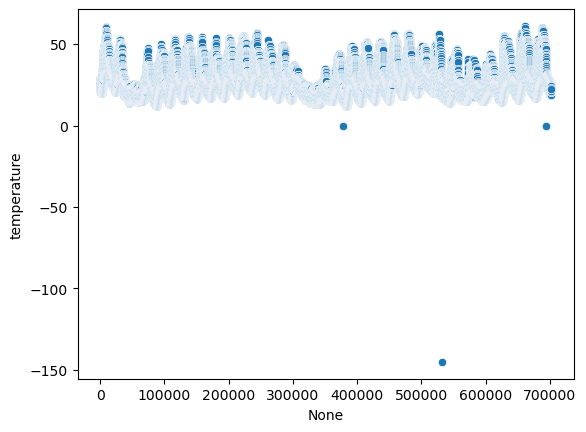

In [21]:
sns.scatterplot(data = data,x = data.index,y = data["temperature"])
plt.show()

<Axes: xlabel='temperature'>

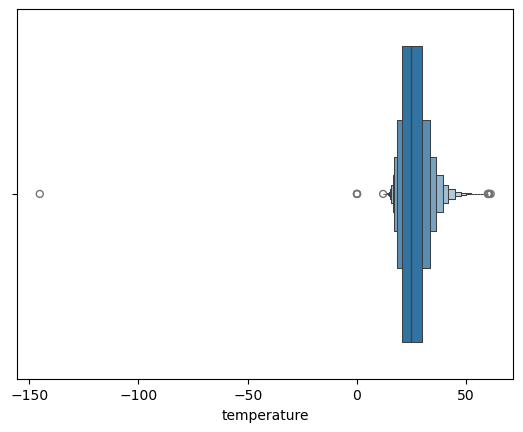

In [22]:
sns.boxenplot(data= data,x = "temperature")

In [23]:
data[data["temperature"]<-100]

,lat,lon,pressure,temperature,humidity
531939,42.686,23.351,117638.84,-145.12,100.0


In [24]:
res = data[data.isin([-145.12]).any(axis = 1)]
print(res)

           lat     lon   pressure  temperature  humidity
531939  42.686  23.351  117638.84      -145.12     100.0


In [25]:
data["temperature"].unique()

array([2.346e+01, 2.306e+01, 2.653e+01, ..., 5.274e+01, 5.219e+01,
       1.000e-02])

In [26]:
data["temperature"].mean()

25.675188448100606

In [27]:
data["temperature"] = data["temperature"].replace(-145.12,25.67)

In [28]:
data["temperature"]

0         23.46
1         23.06
2         26.53
3         28.34
4         26.31
          ...  
701543    21.99
701544    21.41
701545    22.53
701546    23.01
701547    22.57
Name: temperature, Length: 697513, dtype: float64

In [29]:
res = data[data.isin([0]).any(axis = 1)]
print(res)

           lat     lon   pressure  temperature  humidity
13      42.666  23.284   94537.78        24.31       0.0
48      42.666  23.284   94535.77        24.29       0.0
83      42.666  23.284   94533.23        24.21       0.0
119     42.666  23.284   94531.71        24.27       0.0
155     42.666  23.284   94536.31        24.32       0.0
...        ...     ...        ...          ...       ...
693379  42.654  23.330   94947.94        34.84       0.0
693425  42.654  23.330   94949.71        33.98       0.0
693480  42.654  23.330   94955.95        33.27       0.0
693615  42.654  23.330  100002.26         0.01       0.0
693853  42.654  23.330       0.00         0.00       0.0

[29742 rows x 5 columns]


In [30]:
data[data["temperature"]==0]

,lat,lon,pressure,temperature,humidity
378151,42.703,23.373,0.0,0.0,0.0
693853,42.654,23.330,0.0,0.0,0.0


In [31]:
data.shape

(697513, 5)

In [32]:
data.drop([378151,693853],inplace=True)

In [33]:
data.shape

(697511, 5)

<Axes: xlabel='temperature'>

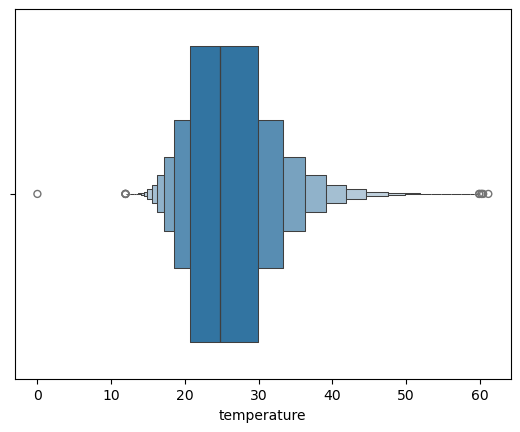

In [34]:
sns.boxenplot(data= data,x = "temperature")

In [35]:
data[data["temperature"]<1]

,lat,lon,pressure,temperature,humidity
693615,42.654,23.33,100002.26,0.01,0.0


In [36]:
data.drop(693615,inplace=True)

In [37]:
data.shape

(697510, 5)

<Axes: xlabel='temperature'>

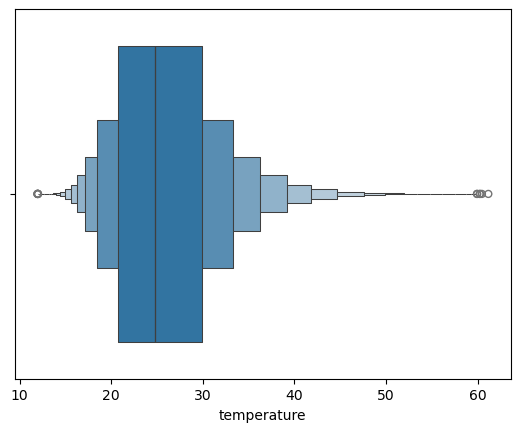

In [38]:
sns.boxenplot(data= data,x = "temperature")

In [39]:
data = data[data["temperature"]<57]

<Axes: xlabel='temperature'>

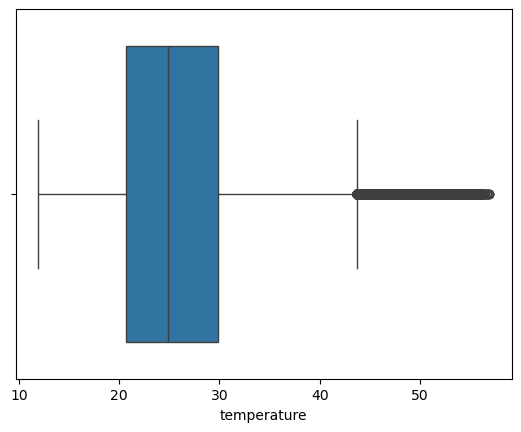

In [40]:
sns.boxplot(data = data,x = "temperature")

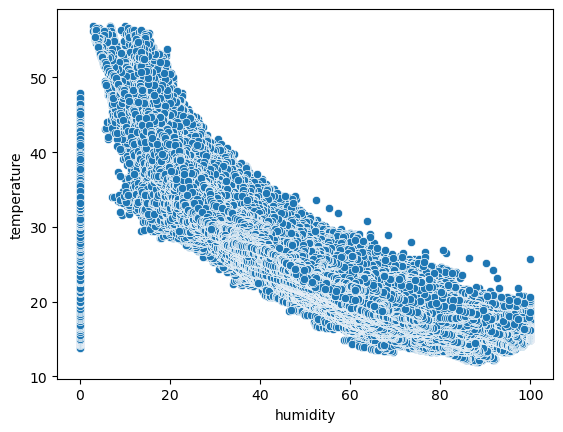

In [41]:
sns.scatterplot(x="humidity", y="temperature", data=data)
plt.show()

<Axes: xlabel='lon'>

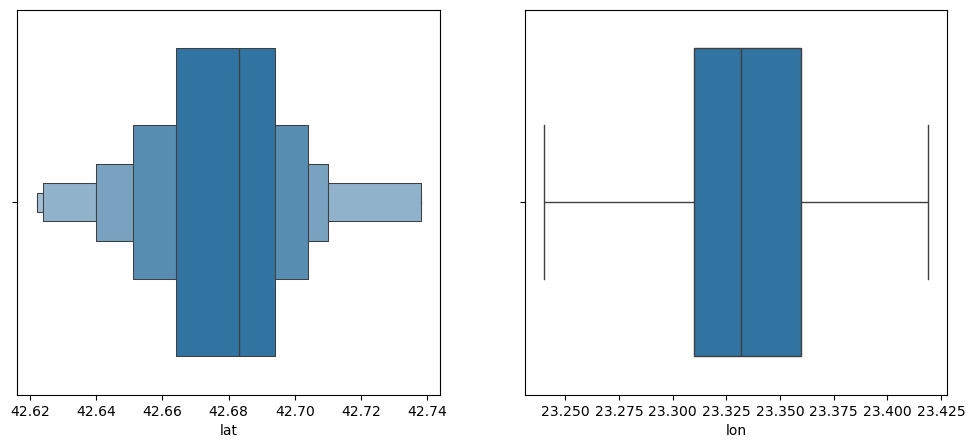

In [42]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxenplot(data= data,x = "lat")
plt.subplot(1,2,2)
sns.boxplot(data = data,x = "lon")

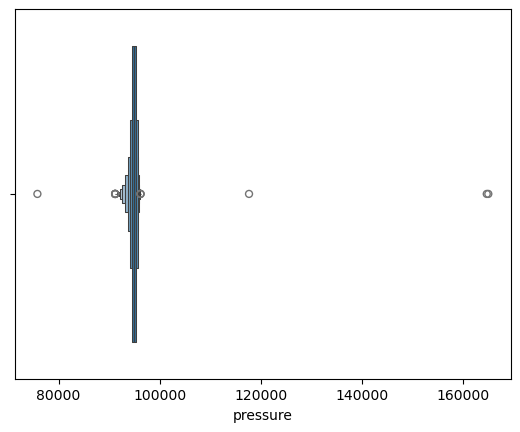

In [43]:
sns.boxenplot(data = data,x = "pressure")
plt.show()

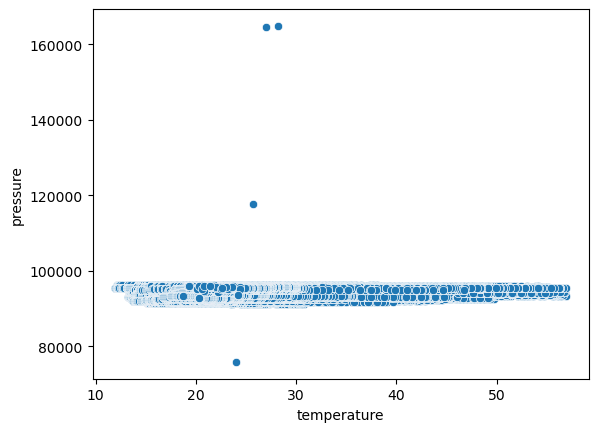

In [44]:
sns.scatterplot(data = data,x = "temperature",y = "pressure")
plt.show()

In [45]:
data = data[data["pressure"]>90000]

In [46]:
data = data[data["pressure"]<105000]

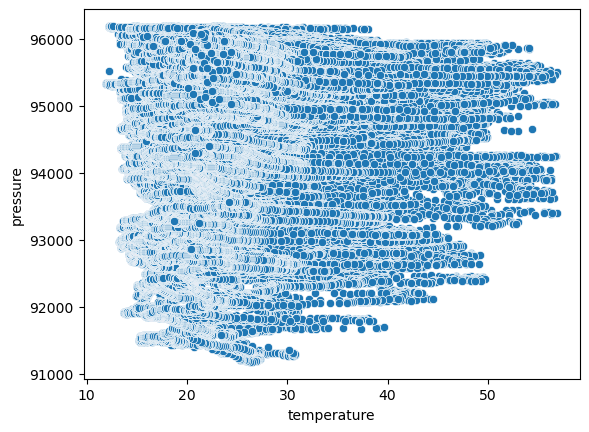

In [47]:
sns.scatterplot(data = data,x = "temperature",y = "pressure")
plt.show()

<Axes: xlabel='pressure'>

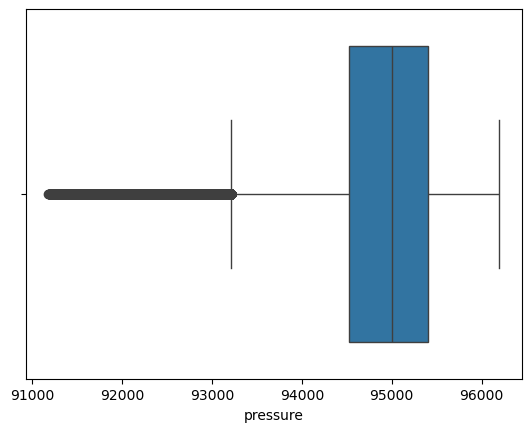

In [48]:
sns.boxplot(data = data,x = "pressure")

In [49]:
data.shape

(697451, 5)

In [50]:
data.head()

,lat,lon,pressure,temperature,humidity
0,42.738,23.272,95270.27,23.46,62.48
1,42.663,23.273,94355.83,23.06,59.46
2,42.700,23.360,95155.81,26.53,44.38
3,42.624,23.406,94679.57,28.34,38.28
4,42.669,23.318,94327.88,26.31,46.37


### humidity data was good

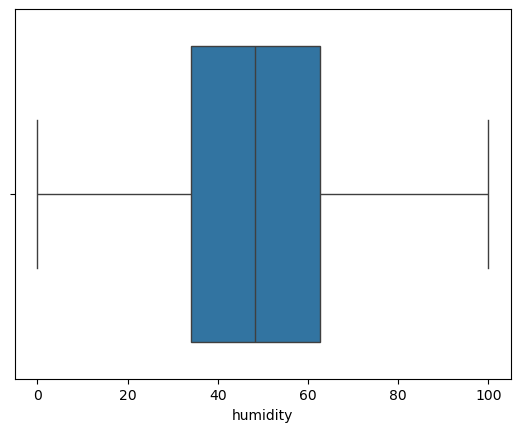

In [52]:
sns.boxplot(data = data,x = "humidity")
plt.show()

In [53]:
data.head()

,lat,lon,pressure,temperature,humidity
0,42.738,23.272,95270.27,23.46,62.48
1,42.663,23.273,94355.83,23.06,59.46
2,42.700,23.360,95155.81,26.53,44.38
3,42.624,23.406,94679.57,28.34,38.28
4,42.669,23.318,94327.88,26.31,46.37


In [54]:
data.shape

(697451, 5)

In [55]:
x = data[["lat","lon","pressure","humidity"]]

In [56]:
y = data["temperature"]

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
x_train.shape

(557960, 4)

In [60]:
x_test.shape

(139491, 4)

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scale  = StandardScaler() # for linear regression

In [63]:
x_train_scale = scale.fit_transform(x_train)
x_test_scale = scale.fit_transform(x_test)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model_1 = LinearRegression()

In [66]:
model_1.fit(x_train_scale,y_train)

LinearRegression()

In [67]:
pre = model_1.predict(x_test_scale)

In [68]:
model_1.score(x_test_scale,y_test)

0.6280571907059047

In [69]:
from sklearn.metrics import r2_score

In [70]:
r2  = r2_score(y_test,pre)

In [71]:
r2

0.6280571907059047

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [149]:
rr  = RandomForestRegressor(n_estimators=50,max_depth=15,random_state=42)

In [151]:
rr.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, n_estimators=50, random_state=42)

In [153]:
pre_1  = rr.predict(x_test)

In [155]:
r3  = r2_score(y_test,pre_1)

In [161]:
print(r3*100)


90.36484601620852


In [163]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [167]:
mae  = mean_absolute_error(y_true = y_test,y_pred = pre_1)

In [169]:
print(mae)

1.385325994873206


In [171]:
mse = mean_squared_error(y_true=y_test,y_pred=pre_1)

In [173]:
print(mse)

3.9811787247792343


In [ ]:
# linear regression 

In [175]:
mae  = mean_absolute_error(y_true = y_test,y_pred = pre)

In [177]:
print(mae)

2.621558441953339


In [179]:
mse = mean_squared_error(y_true=y_test,y_pred=pre)

In [181]:
print(mse)

15.368418622964041
